##  Vivek Varadarajan


In [195]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import *
from sklearn.metrics import mean_squared_error, r2_score



In [196]:
# Load the diabetes dataset
diabetes=datasets.load_diabetes()
import pandas as pd
diabetesdf=pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
diabetesdf=pd.concat([diabetesdf,pd.DataFrame(diabetes.target,columns=['disease_level'])],axis=1)
diabetesdf

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [197]:
diabetesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            442 non-null    float64
 1   sex            442 non-null    float64
 2   bmi            442 non-null    float64
 3   bp             442 non-null    float64
 4   s1             442 non-null    float64
 5   s2             442 non-null    float64
 6   s3             442 non-null    float64
 7   s4             442 non-null    float64
 8   s5             442 non-null    float64
 9   s6             442 non-null    float64
 10  disease_level  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## interesting to see no null values in any of the columns ! 

In [198]:
diabetesdf.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_level
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


C:\Users\vivek\AppData\Local\Temp\ipykernel_95176\82701877.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  diabetesdf.hist(ax=ax,bins=50)


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'bp'}>,
        <AxesSubplot: title={'center': 's1'}>,
        <AxesSubplot: title={'center': 's2'}>],
       [<AxesSubplot: title={'center': 's3'}>,
        <AxesSubplot: title={'center': 's4'}>,
        <AxesSubplot: title={'center': 's5'}>],
       [<AxesSubplot: title={'center': 's6'}>,
        <AxesSubplot: title={'center': 'disease_level'}>,
        <AxesSubplot: >]], dtype=object)

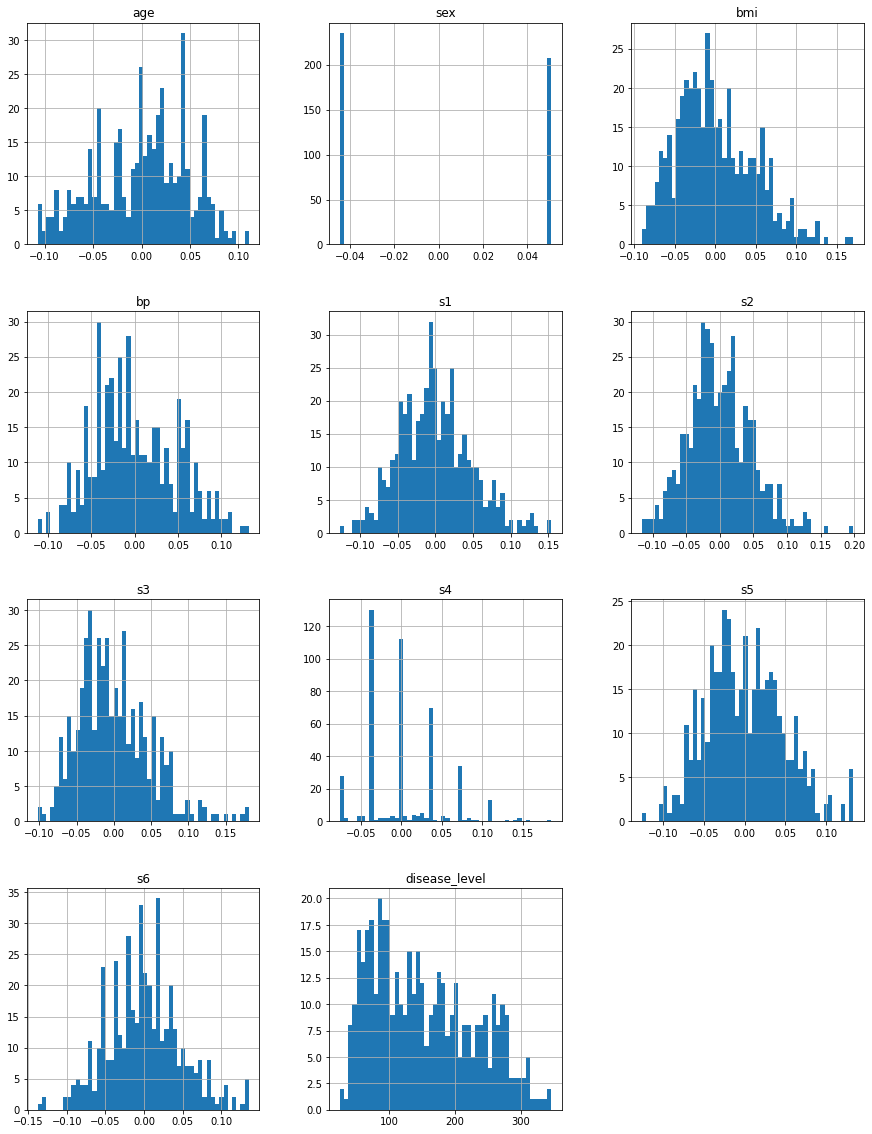

In [108]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
diabetesdf.hist(ax=ax,bins=50)

### Interesting to see most the S-measurements are somewhat normal in distrubution. Also all the features are already normalized to standard normal as per the load_diabetes documentation 

In [199]:
# after splitting test and train data, compute correlation matrix and look at features correlated with disease_level. 
# BMI, BP and s5 stand out as top 3 in terms of correlation.
from sklearn.preprocessing import  normalize
X_train, X_test, y_train, y_test = train_test_split(diabetesdf.iloc[:,0:-1], diabetesdf.disease_level, test_size=0.20,random_state=1)
print("Top 3 correlated variables are ")
pd.concat([X_train,y_train],axis=1).corr().nlargest(4,'disease_level').index[1:]


Top 3 correlated variables are 


Index(['bmi', 's5', 'bp'], dtype='object')

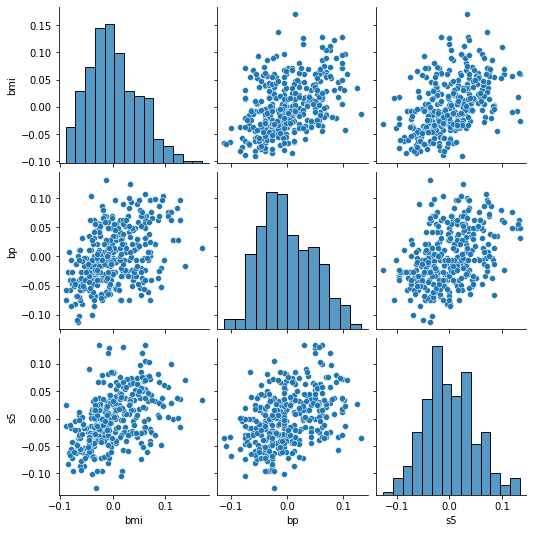

In [201]:
import seaborn as sns
sns.pairplot(X_train[['bmi','bp','s5']])

## bmi , bp and s5 are the most correlated feature set

## Linear regression 

In [194]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Compute the fitted values on training set itself
diabetes_y_fitted = regr.predict(X_train)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train, diabetes_y_fitted)))
print("Regression score: %0.2f" % regr.score(X_train,y_train))

Root Mean squared error: 53.25
Regression score: 0.53


## Decision tree regressor

In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn import metrics

dT=DecisionTreeRegressor(random_state=0,criterion='squared_error')


In [134]:
from sklearn.model_selection import cross_validate
scores = cross_val_score(dT, X_train, y_train, cv = 5)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))



-0.20 accuracy with a standard deviation of 0.41


## Random forest regressor

In [164]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestRegressor(random_state=0,criterion='squared_error')
scores = cross_val_score(rfc, X_train, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.40 accuracy with a standard deviation of 0.16


## Random forest performs better than decision tree

In [136]:
rfcFit=rfc.fit(X_train,y_train)
rfcFit.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

## Random Forest tuning using grid search

In [137]:
param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]}]
rfgrid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)

In [138]:
rfgrid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}])

In [69]:
rfgrid.best_params_

{'max_features': 4, 'n_estimators': 30}

In [293]:
## The score for random forest for the best chosen parameters after cross validation

In [139]:
rfgrid.best_score_

0.4336967085056044

In [140]:
rfgrid.best_estimator_.feature_importances_

array([0.0555662 , 0.01225001, 0.25691045, 0.12528972, 0.05277611,
       0.05539836, 0.0795334 , 0.07657962, 0.18671689, 0.09897923])

In [193]:
rfgrid.best_estimator_.feature_names_in_


array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

## based on feature importances and order of feature names above , we can see that bmi, s5 and BP lines up as most important inline with our correlation matrix inference as well

In [155]:
print(rfgrid.fit(X_test,y_test).best_score_)
bestRf=rfgrid.best_estimator_

0.24620890410915391


## Based on the regression scores, the best performing model between the models here and assignment 1 as well is the RandomForest model after tuning its hyper parameters. 
Applying it on the test data, we get an RMSE of about 25. 


In [146]:
mean_squared_error(bestRf.predict(X_test),y_test)**0.5

25.045962493054553